In [14]:
# import libraries
from skimage.color import rgb2gray
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import cv2

image columns:  512
image rows:  512
image color bgr in pixel 1:  [125 137 226]


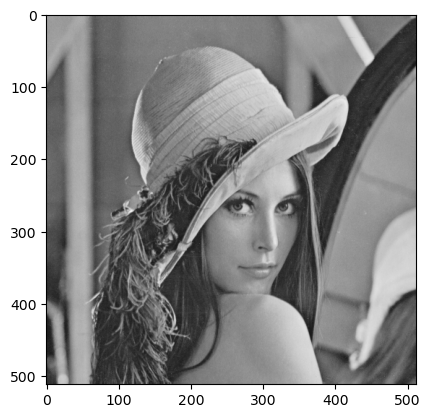

In [24]:
# image made gray
img = cv2.imread("lenna.png")
print('image columns: ', len(img))
print('image rows: ', len(img[0]))
print('image color bgr in pixel 1: ', img[0][0])

# b1 = img[:,:,0]
# g1 = img[:,:,1]
# r1 = img[:,:,2]

# print(img.shape) # returns (height, width, channel)
height, width, channel = img.shape

# create a container for the gray image
img_gray = np.zeros([height, width], img.dtype)

# for each pixel, make the color gray = r * 0.3 + g * 0.59 + b * 0.11
for h in range(height):
    for w in range(width):
        color = img[h, w]# get color in [b, g, r] from img
        
        b1 = color[0]
        g1 = color[1]
        r1 = color[2]

        img_gray[h,w] = int(r1*0.3 + g1*0.59 + b1*0.11)

# cv2.imshow will cause jupyter notebook crash. work around using plt.imshow
plt.imshow(cv2.cvtColor(img_gray, cv2.COLOR_BGR2RGB))
plt.show()

512

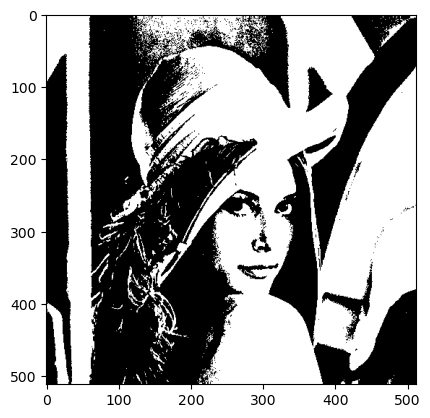

In [28]:
# image made binary (based on img_gray)
height, width = img_gray.shape[:2]
img_binary = np.zeros([height, width], img_gray.dtype)
for h in range(height):
    for w in range(width):
        shade_gray = img_gray[h, w]
        img_binary[h, w] = 1 if shade_gray/254 > 0.5 else 0

plt.imshow(img_binary, cmap = 'gray') # binary images don't have color channels
plt.show()

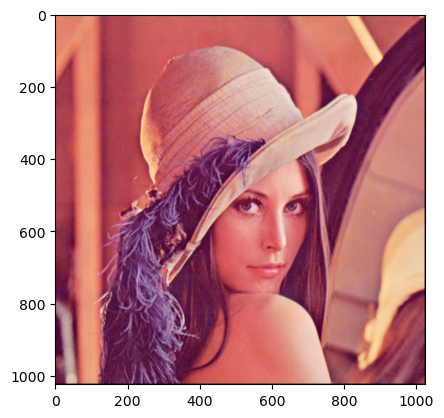

In [48]:
# nearest interpolation
enlarge_ratio = 2
height, width, channel = img.shape

image_large = np.zeros((enlarge_ratio*height, enlarge_ratio*width, channel), img.dtype) # now we need rgb color so we need (x,y,z) to be assigned to each pixel
for h in range(enlarge_ratio * height -1):
    for w in range(enlarge_ratio * width -1):
        x = int(h/enlarge_ratio + 0.5)
        y = int(w/enlarge_ratio + 0.5)
        image_large[h,w] = img[x,y]
        
plt.imshow(cv2.cvtColor(image_large, cv2.COLOR_BGR2RGB))
plt.show()